In [ ]:
import pandas as pd
import numpy as np
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]

In [ ]:
tr = pd.read_csv('Train.csv')
tr.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0,0,0.260191,0.607898,0.000188,0.010018,0.121705,0.283468,0.716532,0.273727,0.726273,0.118825,0.881175,0.832913,0.012336,0.001923,0.050939,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0,0.006793,0.357455,0.563166,0.004260,0.072996,0.002123,0.919424,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0,0,0.290228,0.549788,0.000000,0.021336,0.138647,0.103641,0.896359,0.144638,0.855362,0.066903,0.933097,0.879655,0.008445,0.000328,0.011249,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0,0.028061,0.698428,0.278006,0.003695,0.015835,0.004036,0.959259,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0,0,0.186435,0.677005,0.000489,0.021315,0.114757,0.165772,0.834228,0.272220,0.727780,0.100009,0.899991,0.565546,0.015991,0.001566,0.111270,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0,0.002200,0.672452,0.154225,0.002181,0.167494,0.003649,0.826164,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0,0,0.281229,0.593281,0.000579,0.007249,0.117663,0.087768,0.912232,0.127875,0.872125,0.029155,0.970845,0.743812,0.006530,0.001188,0.086423,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0,0.000174,0.728014,0.263831,0.001806,0.000956,0.005393,0.986151,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0,0,0.196687,0.517578,0.000989,0.005148,0.279598,0.345975,0.654025,0.404507,0.595493,0.133552,0.866448,0.422623,0.014352,0.000842,0.121869,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0,0.192272,0.753491,0.129654,0.004523,0.106953,0.005380,0.957376,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [ ]:
ts = pd.read_csv('Test.csv')
ts.head()

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,21001001: Ward 1,2504.95194,8745.15151,0.947257,0.000873,0.002021,0.000000,0.000000,0.030116,0.000452,0.013018,0.003516,0.000000,0.000668,0.002078,0.0,0.0,0.246694,0.615326,0.000000,0.016724,0.121257,0.155406,0.844594,0.216589,0.783411,0.173569,0.826431,0.817552,0.022885,0.000643,0.125655,0.000400,0.000125,0.002761,0.006069,0.000384,0.000131,0.000259,0.0,0.004612,0.0,0.018525,0.173136,0.736099,0.003712,0.083467,0.003586,0.921001,0.551691,0.427445,0.012457,0.001757,0.000000,0.0,0.006649,0.0,0.0,ZA2101001,-32.637758,23.848688,0.000000
1,21001002: Ward 2,2080.27718,7258.11764,0.844993,0.000481,0.043629,0.004714,0.012323,0.012300,0.022132,0.022412,0.016969,0.006702,0.006492,0.006853,0.0,0.0,0.193484,0.532209,0.000936,0.052571,0.220800,0.406129,0.593871,0.498555,0.501445,0.366732,0.633268,0.434771,0.106254,0.000439,0.289230,0.001222,0.001483,0.002284,0.003142,0.001063,0.000162,0.000000,0.0,0.005779,0.0,0.154172,0.471349,0.191902,0.002854,0.324584,0.009311,0.955494,0.759594,0.227192,0.009606,0.000691,0.000000,0.0,0.002916,0.0,0.0,ZA2101002,-31.990536,24.555818,0.000000
2,21001003: Ward 3,1106.62639,5919.13170,0.651380,0.007937,0.007113,0.000000,0.001977,0.259711,0.006505,0.044153,0.013530,0.000000,0.000000,0.007695,0.0,0.0,0.295614,0.499440,0.011465,0.078808,0.114673,0.237233,0.762767,0.190044,0.809956,0.090176,0.909824,0.953113,0.015398,0.000380,0.017653,0.000766,0.000190,0.002090,0.001140,0.003230,0.002241,0.000755,0.0,0.003043,0.0,0.000000,0.079592,0.914919,0.001520,0.000549,0.003420,0.975955,0.704033,0.291719,0.001996,0.002253,0.000000,0.0,0.000000,0.0,0.0,ZA2101003,-32.283595,24.563940,8.269556
3,21001004: Ward 4,2175.56096,10280.57452,0.410837,0.002468,0.011511,0.000485,0.000000,0.449604,0.009256,0.101963,0.001516,0.009203,0.000000,0.003157,0.0,0.0,0.265445,0.519198,0.000000,0.014156,0.201201,0.343086,0.656914,0.348310,0.651690,0.248744,0.751256,0.852038,0.020889,0.000985,0.018133,0.000219,0.000552,0.000865,0.005020,0.000766,0.000000,0.000109,0.0,0.001208,0.0,0.099216,0.102274,0.832795,0.006965,0.054769,0.003197,0.965817,0.556172,0.439729,0.002060,0.000000,0.000661,0.0,0.001379,0.0,0.0,ZA2101004,-32.261612,24.542202,8.626625
4,21001005: Ward 5,1270.83883,6018.34202,0.942851,0.002638,0.000821,0.000000,0.000891,0.000787,0.000830,0.027930,0.001617,0.017343,0.000000,0.004291,0.0,0.0,0.285008,0.552023,0.000187,0.053495,0.109287,0.255566,0.744434,0.182219,0.817781,0.137765,0.862235,0.965567,0.011856,0.000374,0.010614,0.001126,0.000000,0.001869,0.004672,0.000747,0.000000,0.000747,0.0,0.002429,0.0,0.000000,0.033536,0.956602,0.007059,0.000000,0.002803,0.951707,0.444380,0.553173,0.000787,0.000000,0.000000,0.0,0.001660,0.0,0.0,ZA2101005,-32.251571,24.558537,8.601754


In [ ]:
var_desc = pd.read_csv('variable_descriptions.csv')
pd.set_option('display.max_colwidth', 200) # So that we can see the full descriptions
var_desc

,Column,Description,Unnamed: 2,Unnamed: 3
0,dw_00,Percentage of dwellings of type: House or brick/concrete block structure on a separate stand or yard or on a farm,NaN,NaN
1,dw_01,Percentage of dwellings of type: Traditional dwelling/hut/structure made of traditional materials,NaN,NaN
2,dw_02,Percentage of dwellings of type: Flat or apartment in a block of flats,NaN,NaN
3,dw_03,Percentage of dwellings of type: Cluster house in complex,NaN,NaN
4,dw_04,Percentage of dwellings of type: Townhouse (semi-detached house in a complex),NaN,NaN
5,dw_05,Percentage of dwellings of type: Semi-detached house,NaN,NaN
6,dw_06,Percentage of dwellings of type: House/flat/room in backyard,NaN,NaN
7,dw_07,Percentage of dwellings of type: Informal dwelling (shack,in backyard),NaN
8,dw_08,Percentage of dwellings of type: Informal dwelling (shack,not in backyard,e.g. in an informal/squatter settlement or on a farm)
9,dw_09,Percentage of dwellings of type: Room/flatlet on a property or larger dwelling/servants quarters/granny flat,NaN,NaN


In [ ]:
ss = pd.read_csv('SampleSubmission.csv')
ss.head()

,ward,target
0,21001001: Ward 1,21.87
1,21001002: Ward 2,65.94
2,21001003: Ward 3,83.65
3,21001004: Ward 4,NaN
4,21001005: Ward 5,NaN


# Data Cleaning:

In [ ]:
tr.shape

(2822, 63)

In [ ]:
ts.shape

(1013, 62)

Missing values and datatype per column::

In [ ]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ward               2822 non-null   object 
 1   total_households   2822 non-null   float64
 2   total_individuals  2822 non-null   float64
 3   target             2822 non-null   float64
 4   dw_00              2822 non-null   float64
 5   dw_01              2822 non-null   float64
 6   dw_02              2822 non-null   float64
 7   dw_03              2822 non-null   float64
 8   dw_04              2822 non-null   float64
 9   dw_05              2822 non-null   float64
 10  dw_06              2822 non-null   float64
 11  dw_07              2822 non-null   float64
 12  dw_08              2822 non-null   float64
 13  dw_09              2822 non-null   float64
 14  dw_10              2822 non-null   float64
 15  dw_11              2822 non-null   float64
 16  dw_12              2822 

In [ ]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ward               1013 non-null   object 
 1   total_households   1013 non-null   float64
 2   total_individuals  1013 non-null   float64
 3   dw_00              1013 non-null   float64
 4   dw_01              1013 non-null   float64
 5   dw_02              1013 non-null   float64
 6   dw_03              1013 non-null   float64
 7   dw_04              1013 non-null   float64
 8   dw_05              1013 non-null   float64
 9   dw_06              1013 non-null   float64
 10  dw_07              1013 non-null   float64
 11  dw_08              1013 non-null   float64
 12  dw_09              1013 non-null   float64
 13  dw_10              1013 non-null   float64
 14  dw_11              1013 non-null   float64
 15  dw_12              1013 non-null   float64
 16  dw_13              1013 

Duplicates::

In [ ]:
tr.duplicated().any()

False

In [ ]:
ts.duplicated().any()

False

In [ ]:
new_list = tr.columns[:31]

In [ ]:
next_list = tr.columns[31:]

In [ ]:
atr = tr.drop(new_list, axis=1)
btr = tr.drop(next_list, axis=1)

In [ ]:
atr.shape

(2822, 32)

In [ ]:
btr.shape

(2822, 31)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5d29d7d10>,
      dtype=object)

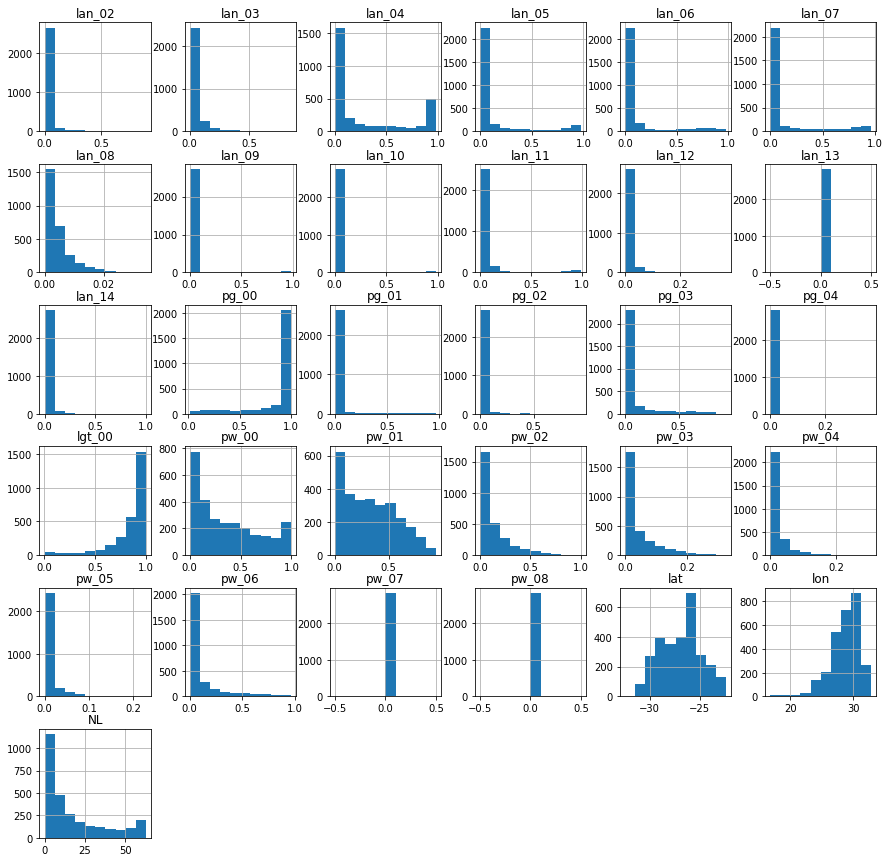

In [ ]:
# Plot histogram of numeric variables in dataset
atr.hist(figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5d1bd0650>,
      dtype=object)

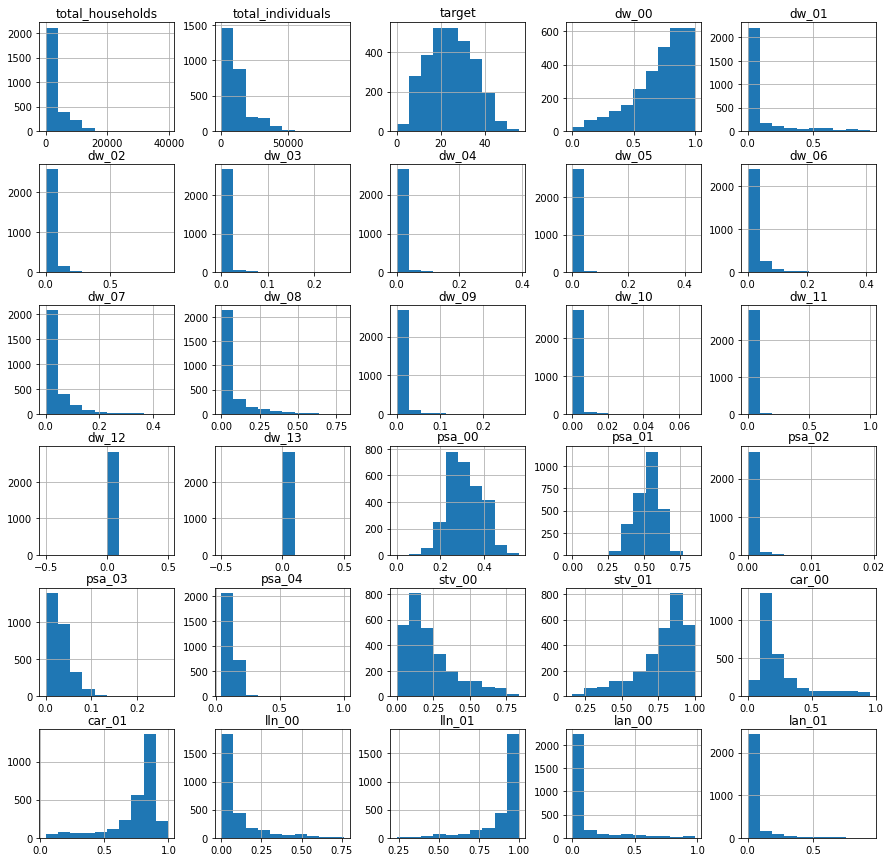

In [ ]:
# Plot histogram of numeric variables in dataset
btr.hist(figsize=(15,15))

## Looking at the target variable
The purpose of this competition is to predict the percentage of households in a ward that are woman-headed and have an annual household income of <R19,600. To put that in context, that's less than 250USD per month. 

Text(0.5, 0, 'Percentage of households that are w-headed and have income under R19.6k/month')

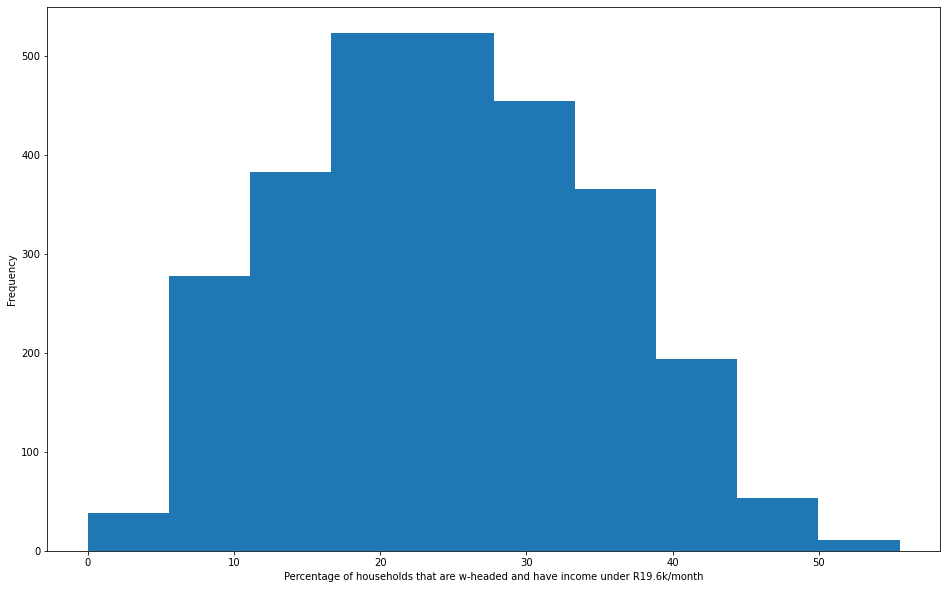

In [ ]:
# Plot the distribution
ax = df['target'].plot(kind='hist')
plt.xlabel('Percentage of households that are w-headed and have income under R19.6k/month')

# Looking at a few interesting correlations

In [ ]:
# Strong +ve correlations
df.corr()['target'].sort_values(ascending=False).head(10)

target    1.000000
psa_00    0.782472
car_01    0.702831
stv_01    0.664181
lln_01    0.637835
pg_00     0.613346
pw_06     0.470676
dw_01     0.458206
pw_02     0.442441
pw_03     0.440941
Name: target, dtype: float64

In [ ]:
# And negative correlations
df.corr()['target'].sort_values().head(10)

pw_00    -0.754536
psa_01   -0.707506
car_00   -0.702831
stv_00   -0.664181
lln_00   -0.637835
pg_03    -0.583908
NL       -0.514398
lan_00   -0.507942
lan_01   -0.438704
dw_04    -0.385533
Name: target, dtype: float64

There are some high correlations here. Let's pick a few and investigate.

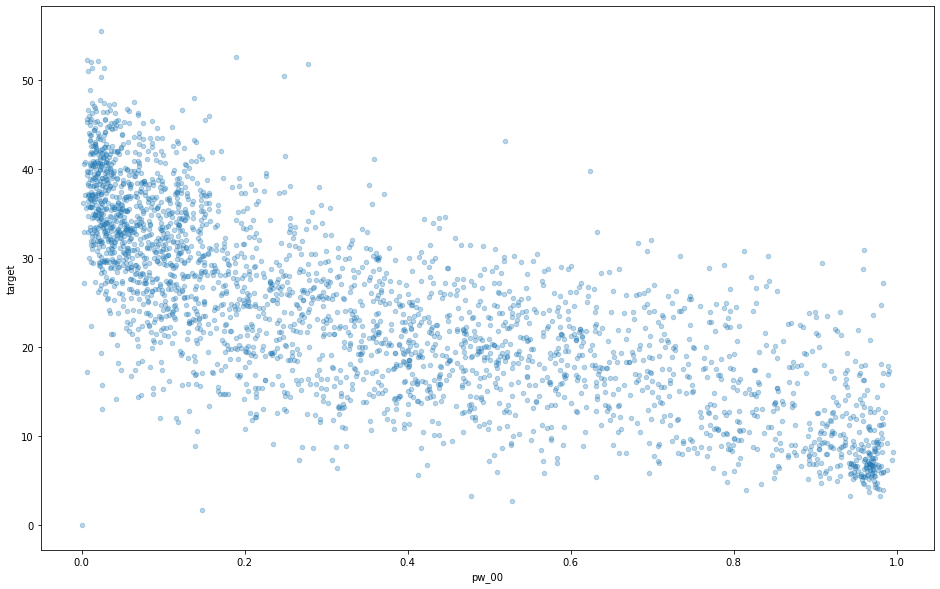

In [ ]:
# pw_00: running water in the home. Places where almost everyone has piped water tend to be more affluent.
df.plot(x='pw_00', y='target', kind='scatter', alpha=0.3)

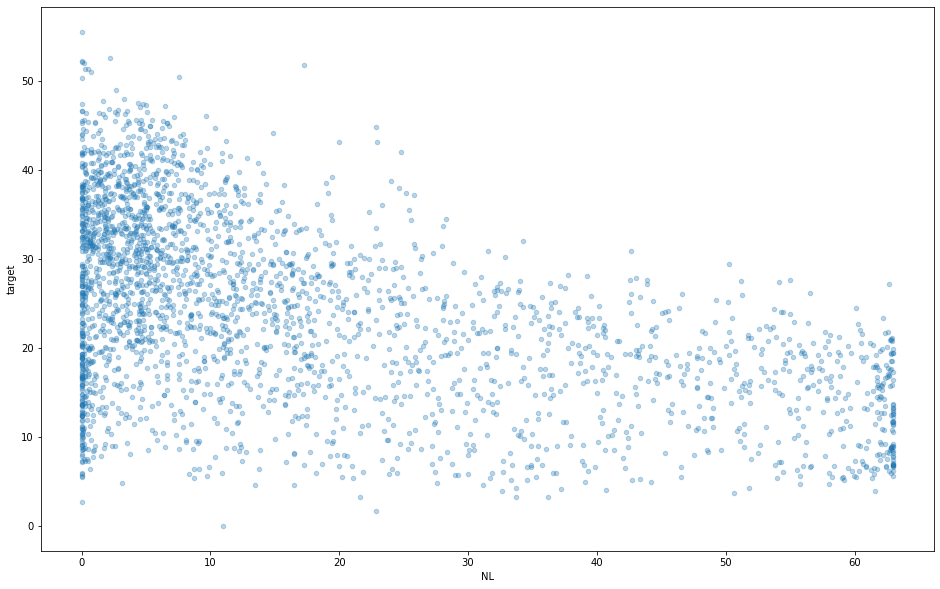

In [ ]:
# Nightlights (NL)
df.plot(x='NL', y='target', kind='scatter', alpha=0.3)

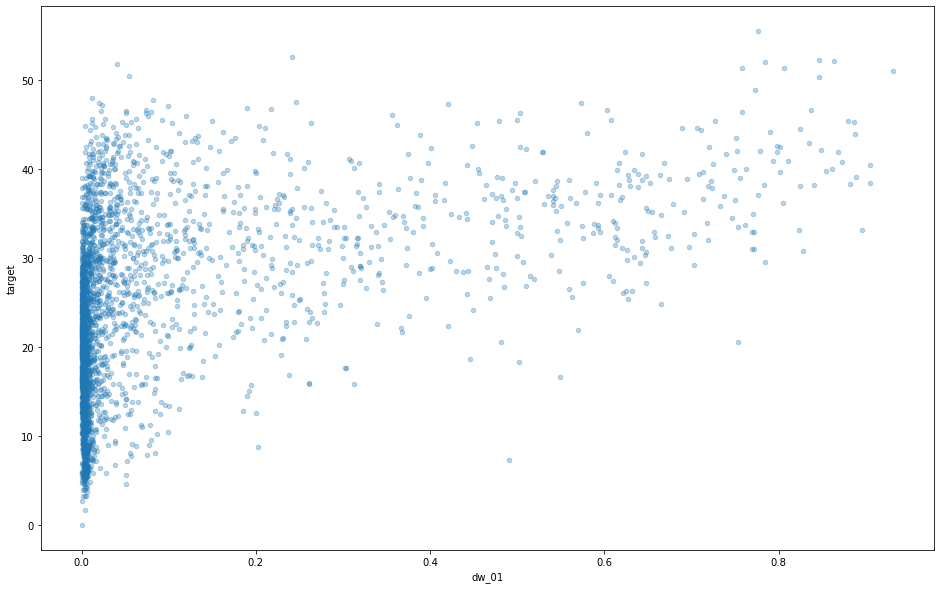

In [ ]:
# dw_01: Percentage of dwellings of type: Traditional dwelling/hut/structure made of traditional materials
# Places where many of the buildings are 'traditional' tend to have more households 
# in the target category. 
df.plot(x='dw_01', y='target', kind='scatter', alpha=0.3)

Notice that for the dwelling type example above, the left hand side of the graph is chaotic. Fitting a straight line would tell part of the story, but to fully capture the trend we'd have to look at this data in conjunction with info on all the other dwelling types, and think about how trends might be different in rural vs urban areas. 